<a href="https://colab.research.google.com/github/VirdiRajvir/fraudDetection_Datathon/blob/Shaurya/SVM_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

# Step 1: Load the dataset
df = pd.read_csv('/content/undersampled_dataset.csv')

# Inspect the first few rows of the dataset
print(df.head())

# Step 2: Data Preprocessing

# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'X'], errors='ignore')

# Convert 'trans_date_trans_time' to datetime and extract useful time components
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second
df = df.drop(columns=['trans_date_trans_time'])

# Convert 'dob' to 'age'
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['year'] - df['dob'].dt.year
df = df.drop(columns=['dob'])

# Step 3: Encoding categorical features
label_encoders = {}
for column in ['merchant', 'category', 'city', 'state', 'job', 'gender']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 4: Create the 'logamt' feature
df['logamt'] = df['amt'].apply(lambda x: np.log(x + 1))

# Step 5: Prepare Features and Target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 8: Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 9: Predictions
y_pred = svm_model.predict(X_test)





   Unnamed: 0        X trans_date_trans_time                  merchant  \
0           1   972276   2020-01-28 10:44:47        fraud_Kris-Padberg   
1           2    28316   2019-01-17 14:14:15  fraud_Turcotte-Halvorson   
2           3  1084421   2020-03-26 16:30:35    fraud_Bogisich-Weimann   
3           4  1010391   2020-02-20 08:31:28     fraud_Heidenreich PLC   
4           5   470575   2019-07-26 16:24:50   fraud_Kuphal-Bartoletti   

       category    amt gender           city state  city_pop  \
0  shopping_pos   3.45      F   Laguna Hills    CA     45303   
1      misc_pos   7.56      M  West Harrison    NY     11250   
2     kids_pets  52.82      M        Zaleski    OH       341   
3   grocery_pos  92.72      F        Brunson    SC      1725   
4      misc_net   9.64      M           Reno    NV    276896   

                     job         dob  is_fraud    logamt  
0        Sales executive  1969-12-22         0  1.238374  
1          Lexicographer  1977-08-16         0  2.02

In [ ]:
# Step 10: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8584
Precision: 0.9543
Recall: 0.7541
F1 Score: 0.8424


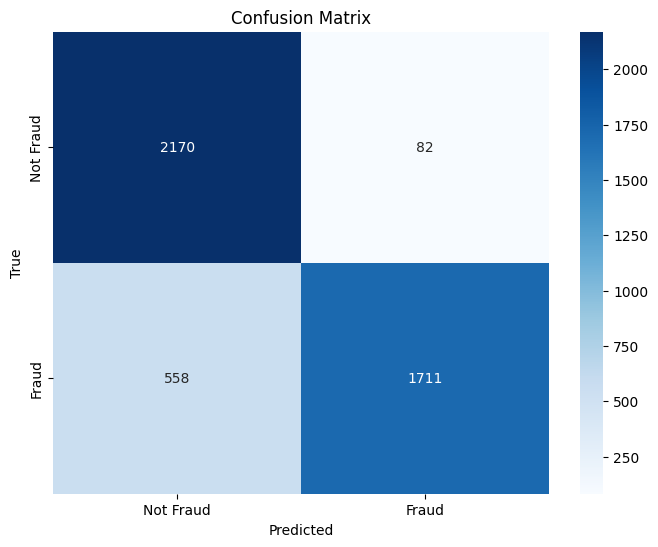

In [ ]:
# Step 11: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

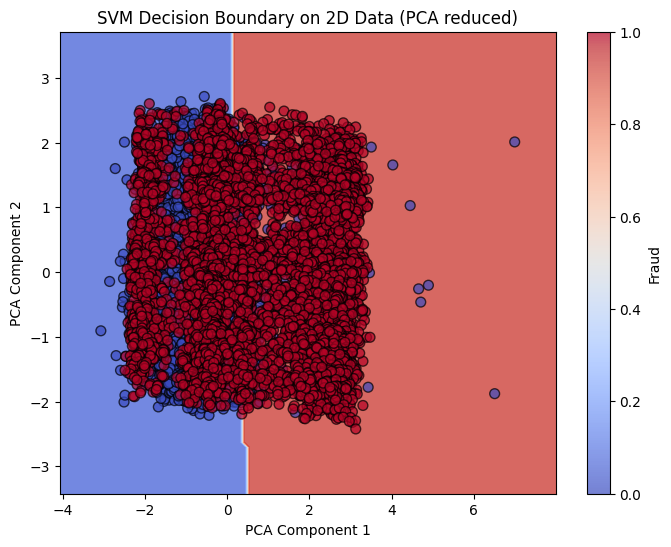

In [ ]:
# Step 1: Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 2: Train the SVM model on the 2D data
svm_model = SVC(kernel='linear')  # Using linear kernel for simplicity
svm_model.fit(X_pca, y)

# Step 3: Create a meshgrid to plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Step 4: Predict the labels for the meshgrid points
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot the decision boundary
plt.figure(figsize=(8, 6))

# Plot the decision boundary and margins
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot the actual data points, colored by the fraud class (0 or 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', s=50, edgecolors='k', alpha=0.7)

# Add titles and labels
plt.title('SVM Decision Boundary on 2D Data (PCA reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Fraud')

# Show the plot
plt.show()


In [ ]:
# Function to preprocess new data and make predictions
def preprocess_and_predict(input_data):
    # Preprocess the input data (same as training data)

    # Convert 'trans_date_trans_time' to datetime and extract features
    input_data['trans_date_trans_time'] = pd.to_datetime(input_data['trans_date_trans_time'])
    input_data['year'] = input_data['trans_date_trans_time'].dt.year
    input_data['month'] = input_data['trans_date_trans_time'].dt.month
    input_data['day'] = input_data['trans_date_trans_time'].dt.day
    input_data['hour'] = input_data['trans_date_trans_time'].dt.hour
    input_data['minute'] = input_data['trans_date_trans_time'].dt.minute
    input_data['second'] = input_data['trans_date_trans_time'].dt.second
    input_data = input_data.drop(columns=['trans_date_trans_time'])

    # Convert 'dob' to 'age'
    input_data['dob'] = pd.to_datetime(input_data['dob'])
    input_data['age'] = input_data['year'] - input_data['dob'].dt.year
    input_data = input_data.drop(columns=['dob'])

    # Encode categorical columns using the same label encoders
    for column in ['merchant', 'category', 'city', 'state', 'job', 'gender']:
        input_data[column] = label_encoders[column].transform(input_data[column])

    # Create the 'logamt' feature for input data
    input_data['logamt'] = input_data['amt'].apply(lambda x: np.log(x + 1))

    # Ensure the input data has the same columns as the training data
    input_data = input_data[X.columns]

    # Scale the input data using the same scaler
    input_data_scaled = scaler.transform(input_data)

    # Make the prediction using the trained SVM model
    prediction = svm_model.predict(input_data_scaled)

    # Return the prediction: 1 for fraud, 0 for not fraud
    return "Fraud" if prediction[0] == 1 else "Not Fraud"

# Step 14: Example input data (replace with your actual data)
new_data = pd.DataFrame({
    'trans_date_trans_time': ['2020-03-15 22:17:28', '2020-06-01 18:02:22', '2020-04-06 21:20:12',
                             '2019-07-12 11:22:05', '2019-01-02 01:06:37', '2019-01-02 01:47:29',
                             '2019-01-02 03:05:23', '2019-01-02 03:38:03'],
    'merchant': ['fraud_Labadie LLC', 'fraud_Pouros-Haag', 'fraud_Will Ltd', 'fraud_Rowe, Batz and Goodwin',
                 'fraud_Rutherford-Mertz', 'fraud_Jenkins, Hauck and Friesen', 'fraud_Goodwin-Nitzsche',
                 'fraud_Erdman-Kertzmann'],
    'category': ['personal_care', 'shopping_pos', 'food_dining', 'grocery_pos', 'grocery_pos', 'gas_transport',
                 'grocery_pos', 'gas_transport'],
    'amt': [88.92, 6.87, 2.82, 50.77, 281.06, 11.52, 276.31, 7.03],
    'gender': ['F', 'M', 'F', 'M', 'M', 'F', 'F', 'M'],
    'city': ['West Sayville', 'Lake Jackson', 'Sutherland', 'Haw River', 'Collettsville', 'San Antonio',
             'San Antonio', 'Collettsville'],
    'state': ['NY', 'TX', 'NE', 'NC', 'NC', 'TX', 'TX', 'NC'],
    'city_pop': [4056, 28739, 1789, 6006, 885, 1595797, 1595797, 885],
    'job': ['Film/video editor', 'Futures trader', 'Insurance broker', 'Paramedic', 'Soil scientist',
            'Horticultural consultant', 'Horticultural consultant', 'Soil scientist'],
    'dob': ['1990-06-25', '1999-12-27', '1982-02-11', '1984-07-20', '1988-09-15', '1960-10-28',
            '1960-10-28', '1988-09-15'],
})

# Step 15: Predict for each transaction in new data
predictions = []
for i, row in new_data.iterrows():
    result = preprocess_and_predict(pd.DataFrame([row]))
    predictions.append(result)

# Step 16: Print the predictions
for i, result in enumerate(predictions):
    print(f'Transaction {i+1} is predicted as: {result}')


Transaction 1 is predicted as: Not Fraud
Transaction 2 is predicted as: Not Fraud
Transaction 3 is predicted as: Not Fraud
Transaction 4 is predicted as: Not Fraud
Transaction 5 is predicted as: Fraud
Transaction 6 is predicted as: Not Fraud
Transaction 7 is predicted as: Fraud
Transaction 8 is predicted as: Not Fraud


Orignal Answer:
Not Fraud
Not Fraud
Not Fraud
Not Fraud
Fraud
Fraud
Fraud
Fraud


In [ ]:
# Example input data (replace with your actual data)
new_data = pd.DataFrame({
    'trans_date_trans_time': [
        '2019-01-03 23:09:51', '2019-01-03 23:29:57', '2019-01-03 23:41:36',
        '2019-01-03 23:44:42', '2019-01-04 00:58:03', '2019-01-04 02:13:44'
    ],
    'merchant': [
        'fraud_Morissette PLC', 'fraud_Lemke-Gutmann', 'fraud_Mohr-Bayer',
        'fraud_Moen, Reinger and Murphy', 'fraud_Stokes, Christiansen and Sipes',
        'fraud_Rau and Sons'
    ],
    'category': [
        'shopping_pos', 'shopping_net', 'shopping_net', 'grocery_pos', 'grocery_net', 'grocery_pos'
    ],
    'amt': [
        821.96, 1092.68, 1254.27, 274.09, 14.37, 316.93
    ],
    'gender': ['M', 'M', 'M', 'F', 'M', 'F'],
    'city': [
        'Collettsville', 'Collettsville', 'Collettsville', 'San Antonio', 'Wales', 'Manor'
    ],
    'state': ['NC', 'NC', 'NC', 'TX', 'AK', 'PA'],
    'city_pop': [
        885, 885, 885, 1595797, 145, 1472
    ],
    'job': [
        'Soil scientist', 'Soil scientist', 'Soil scientist', 'Horticultural consultant',
        'Administrator, education', 'Public affairs consultant'
    ],
    'dob': [
        '1988-09-15', '1988-09-15', '1988-09-15', '1960-10-28', '1939-11-09', '1941-03-07'
    ],
})

# Step 15: Predict for each transaction in new data
predictions = []
for i, row in new_data.iterrows():
    result = preprocess_and_predict(pd.DataFrame([row]))
    predictions.append(result)

# Step 16: Print the predictions
for i, result in enumerate(predictions):
    print(f'Transaction {i+1} is predicted as: {result}')



Transaction 1 is predicted as: Fraud
Transaction 2 is predicted as: Fraud
Transaction 3 is predicted as: Fraud
Transaction 4 is predicted as: Fraud
Transaction 5 is predicted as: Not Fraud
Transaction 6 is predicted as: Fraud


Orignal Outcome: All Frauds


In [ ]:
# Example input data (replace with your actual new data)
new_data = pd.DataFrame({
    'trans_date_trans_time': [
        '2019-10-28 05:12:37', '2020-03-07 12:58:01', '2019-04-07 13:17:58',
        '2019-05-27 05:15:20'
    ],
    'merchant': [
        'fraud_Kutch LLC', 'fraud_Gulgowski LLC', 'fraud_Shields-Wunsch',
        'fraud_Corwin-Gorczany'
    ],
    'category': [
        'gas_transport', 'home', 'health_fitness', 'misc_net'
    ],
    'amt': [
        50.62, 109.17, 106.32, 50.00
    ],
    'gender': ['F', 'F', 'F', 'F'],
    'city': ['Stayton', 'Gregory', 'Catawba', 'Orient'],
    'state': ['OR', 'AR', 'VA', 'WA'],
    'city_pop': [
        9587, 37, 1363, 149
    ],
    'job': [
        'Engineer, biomedical', 'Lecturer, further education', 'Equality and diversity officer',
        'Special educational needs teacher'
    ],
    'dob': [
        '1968-03-24', '1958-01-01', '1940-08-23', '1978-06-21'
    ],
})

# Step 15: Predict for each transaction in new data
predictions = []
for i, row in new_data.iterrows():
    result = preprocess_and_predict(pd.DataFrame([row]))
    predictions.append(result)

# Step 16: Print the predictions
for i, result in enumerate(predictions):
    print(f'Transaction {i+1} is predicted as: {result}')


Transaction 1 is predicted as: Not Fraud
Transaction 2 is predicted as: Not Fraud
Transaction 3 is predicted as: Not Fraud
Transaction 4 is predicted as: Not Fraud


Orignal Outcome: All not fraud